### Assignment 3

#### Task 1 (7 points):

* Download the data (*sonar.all-data*) from the *Sonar, Mines vs. Rocks Data Set*: https://archive.ics.uci.edu/ml/datasets/Connectionist+Bench+(Sonar,+Mines+vs.+Rocks)
* Substitute the categories M and R of the last column for integers.
* Find the best parameters on the validation set using gridsearch (min. 2 parameters) for one model.
* Plot a heatmap of the parameters. Find the best set of parameters. Comment your results.
* Plot a ROC curve. Comment your results.

In [2]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

### - Download the data (sonar.all-data)

In [4]:
sonar_df = pd.read_csv('sonar.all-data', sep=',')
sonar_df.columns = ["col_1","col_2","col_3","col_4","col_5","col_6","col_7","col_8","col_9","col_10","col_11","col_12","col_13","col_14","col_15","col_16","col_17","col_18","col_19","col_20","col_21","col_22","col_23","col_24","col_25","col_26","col_27","col_28","col_29","col_30","col_31","col_32","col_33","col_34","col_35","col_36","col_37","col_38","col_39","col_40","col_41","col_42","col_43","col_44","col_45","col_46","col_47","col_48","col_49","col_50","col_51","col_52","col_53","col_54","col_55","col_56","col_57","col_58","col_59","col_60","label"]
sonar_df.head()

,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8,col_9,col_10,...,col_52,col_53,col_54,col_55,col_56,col_57,col_58,col_59,col_60,label
0,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
1,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
2,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
3,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R
4,0.0286,0.0453,0.0277,0.0174,0.0384,0.0990,0.1201,0.1833,0.2105,0.3039,...,0.0045,0.0014,0.0038,0.0013,0.0089,0.0057,0.0027,0.0051,0.0062,R


In [7]:
sonar_df.describe().T

,count,mean,std,min,25%,50%,75%,max
col_1,207.0,0.029208,0.023038,0.0015,0.01330,0.0228,0.03580,0.1371
col_2,207.0,0.038443,0.033040,0.0006,0.01640,0.0308,0.04810,0.2339
col_3,207.0,0.043837,0.038521,0.0015,0.01890,0.0342,0.05820,0.3059
col_4,207.0,0.054053,0.046583,0.0058,0.02445,0.0441,0.06570,0.4264
col_5,207.0,0.075105,0.055669,0.0067,0.03770,0.0620,0.10105,0.4010
col_6,207.0,0.104599,0.059247,0.0102,0.06695,0.0921,0.13415,0.3823
col_7,207.0,0.121591,0.061897,0.0033,0.08060,0.1056,0.15305,0.3729
col_8,207.0,0.134677,0.085340,0.0055,0.08035,0.1119,0.16980,0.4590
col_9,207.0,0.177361,0.118311,0.0075,0.09675,0.1522,0.23150,0.6828
col_10,207.0,0.208245,0.134741,0.0113,0.11115,0.1810,0.26900,0.7106


In [8]:
sonar_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207 entries, 0 to 206
Data columns (total 61 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   col_1   207 non-null    float64
 1   col_2   207 non-null    float64
 2   col_3   207 non-null    float64
 3   col_4   207 non-null    float64
 4   col_5   207 non-null    float64
 5   col_6   207 non-null    float64
 6   col_7   207 non-null    float64
 7   col_8   207 non-null    float64
 8   col_9   207 non-null    float64
 9   col_10  207 non-null    float64
 10  col_11  207 non-null    float64
 11  col_12  207 non-null    float64
 12  col_13  207 non-null    float64
 13  col_14  207 non-null    float64
 14  col_15  207 non-null    float64
 15  col_16  207 non-null    float64
 16  col_17  207 non-null    float64
 17  col_18  207 non-null    float64
 18  col_19  207 non-null    float64
 19  col_20  207 non-null    float64
 20  col_21  207 non-null    float64
 21  col_22  207 non-null    float64
 22  co

### - Substitute the categories M and R of the last column for integers.

In [10]:
labelReplace = {"label": {"M": 0, "R": 1}}
sonar_df.replace(labelReplace, inplace=True)

In [13]:
sonar_df.head()

,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8,col_9,col_10,...,col_52,col_53,col_54,col_55,col_56,col_57,col_58,col_59,col_60,label
0,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,1
1,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,1
2,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,1
3,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,1
4,0.0286,0.0453,0.0277,0.0174,0.0384,0.0990,0.1201,0.1833,0.2105,0.3039,...,0.0045,0.0014,0.0038,0.0013,0.0089,0.0057,0.0027,0.0051,0.0062,1


### - Find the best parameters on the validation set using gridsearch (min. 2 parameters) for one model.

In [26]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler

import mglearn
from IPython.display import display

X = sonar_df.drop('label', axis=1)
y = sonar_df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [27]:
pipe = Pipeline([("scaler", MinMaxScaler()), ("svm", SVC())])

param_grid = {'svm__C': [0.001, 0.01, 0.1, 1, 10, 100],
             'svm__gamma': [0.001, 0.01, 0.1, 1, 10, 100]}

grid = GridSearchCV(pipe, param_grid=param_grid, cv=5)
grid.fit(X_train, y_train)

print("Best cross-validation accuracy: {:.2f}".format(grid.best_score_))
print("Test set score: {:.2f}".format(grid.score(X_test, y_test)))
print("Best parameters: {}".format(grid.best_params_))
print("Best estimator:\n{}".format(grid.best_estimator_))

Best cross-validation accuracy: 0.87
Test set score: 0.81
Best parameters: {'svm__C': 100, 'svm__gamma': 0.1}
Best estimator:
Pipeline(memory=None,
         steps=[('scaler', MinMaxScaler(copy=True, feature_range=(0, 1))),
                ('svm',
                 SVC(C=100, break_ties=False, cache_size=200, class_weight=None,
                     coef0=0.0, decision_function_shape='ovr', degree=3,
                     gamma=0.1, kernel='rbf', max_iter=-1, probability=False,
                     random_state=None, shrinking=True, tol=0.001,
                     verbose=False))],
         verbose=False)


### - Plot a heatmap of the parameters. Find the best set of parameters. Comment your results.

In [28]:
# convert to DataFrame
results = pd.DataFrame(grid.cv_results_)
# show the first 5 rows
display(results.head())

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_svm__C,param_svm__gamma,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.006997,0.000632,0.002998,0.000631,0.001,0.001,"{'svm__C': 0.001, 'svm__gamma': 0.001}",0.517241,0.517241,0.517241,0.517241,0.535714,0.520936,0.007389,15
1,0.005401,0.001849,0.001998,0.000632,0.001,0.01,"{'svm__C': 0.001, 'svm__gamma': 0.01}",0.517241,0.517241,0.517241,0.517241,0.535714,0.520936,0.007389,15
2,0.003799,0.000400,0.001399,0.000490,0.001,0.1,"{'svm__C': 0.001, 'svm__gamma': 0.1}",0.517241,0.517241,0.517241,0.517241,0.535714,0.520936,0.007389,15
3,0.003797,0.000399,0.001599,0.000490,0.001,1,"{'svm__C': 0.001, 'svm__gamma': 1}",0.517241,0.517241,0.517241,0.517241,0.535714,0.520936,0.007389,15
4,0.004198,0.000400,0.001399,0.000490,0.001,10,"{'svm__C': 0.001, 'svm__gamma': 10}",0.517241,0.517241,0.517241,0.517241,0.535714,0.520936,0.007389,15


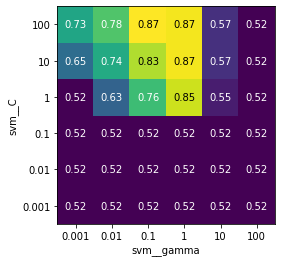

In [29]:
scores = np.array(results.mean_test_score).reshape(6, 6)
# plot the mean cross-validation scores
mglearn.tools.heatmap(scores, xlabel='svm__gamma', xticklabels=param_grid['svm__gamma'],
ylabel='svm__C', yticklabels=param_grid['svm__C'], cmap="viridis")

###### Comment: 
As can be seen above the best range of parameters is C: 10 - 100 and gamma: 0.1 to 1 

### - Plot a ROC curve. Comment your results.

In [38]:
from sklearn.metrics import roc_curve

def plot_roc_curve():
    fpr, tpr, thresholds = roc_curve(y_test, grid.decision_function(X_test))
    

    close_zero = np.argmin(np.abs(thresholds))

    plt.plot(fpr, tpr, label="ROC Curve SVC")
    plt.xlabel("FPR")
    plt.ylabel("TPR (recall)")
    plt.plot(fpr[close_zero], tpr[close_zero], 'o', 
    label="threshold zero SVC", fillstyle="none", c='k', mew=2)
    plt.legend(loc=4)

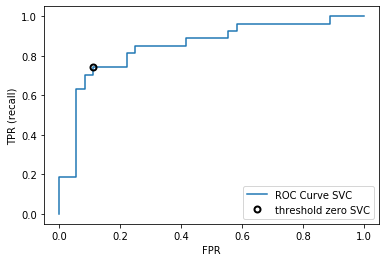

In [39]:
plot_roc_curve()

###### Observation
1. As the ROC curve above shows, when the training begain the curve leaned towards 'sensitivity' (which was very good) but as it progresses it started leaning towards 'specificity' (which is not too good; that means towards the end there are as much False positive rate as there are True positive rate)

2. The optimum threshold for this roc curve is about 0.75; If we move our threshhold to around 0.75, we would be able to classify about 80% true positive correctly with close to 0 false positive

#### Task 2 (8 points):

Data Set Information:

2126 fetal cardiotocograms (CTGs) were automatically processed and the respective diagnostic features measured. The CTGs were also classified by three expert obstetricians and a consensus classification label assigned to each of them. Classification was both with respect to a morphologic pattern (A, B, C. ...) and to a fetal state (N, S, P). Therefore the dataset can be used either for 10-class or 3-class experiments.

* Download the data from the *Cardiotocography Data Set*: https://archive.ics.uci.edu/ml/datasets/Cardiotocography
* Find the best two models by creating a complete pipeline with different parameters and algorithms. One model should predict the *morphologic pattern* and the other the *fetal state*. 
* Comment on the time and preformance metrics used in each model.